In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
data=pd.read_csv(r"train_cleaned.csv")
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [61]:
x=data.drop(["Item_Outlet_Sales"],axis=1)
y=data["Item_Outlet_Sales"]
x.shape,y.shape

((8523, 45), (8523,))

In [62]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [63]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [76]:
lr=LR()
lr.fit(train_x,train_y)

LinearRegression()

In [65]:
train_predict=lr.predict(train_x)
k=mae(train_predict,train_y)
print("Training mean absolute Error",k)

Training mean absolute Error 821.4206146753688


In [66]:
test_predict=lr.predict(test_x)
k=mae(test_predict,test_y)
print("testing mean absolute value",k)

testing mean absolute value 875.2688982985252


In [67]:
lr.coef_

array([ 1.78450035e-01, -3.84642222e+02,  1.54980674e+01, -1.84444754e+01,
       -3.78808067e+01,  3.31502849e+01,  4.06819896e+01,  4.76424149e+01,
       -8.35938826e+01,  2.81126002e+00, -1.19848265e+00, -1.57618523e+02,
        6.71387323e+01, -5.33492180e+01, -3.06556852e+01,  4.23212148e+01,
       -2.30260247e+01, -4.27876198e+01, -7.54301779e+01, -3.65824873e+00,
       -7.87129822e+01,  2.60470952e+02,  1.41600650e+01, -1.46932400e+01,
        9.42279781e+01, -4.64999137e+02, -5.51947683e+01,  1.53301072e+02,
       -4.68181522e+01, -4.71597876e+02,  5.87820902e+02,  1.24396682e+02,
       -8.80903933e+01,  3.17298874e+02, -5.61172040e+01, -5.51947683e+01,
        4.84885546e+02, -2.99023193e+01, -2.10416205e+02,  1.89607361e+02,
        2.08088447e+01, -9.36597012e+02,  3.95594262e+02, -4.68181522e+01,
        5.87820902e+02])

In [68]:
#plotting coeff


Text(0.5, 1.0, 'Coefficient plot')

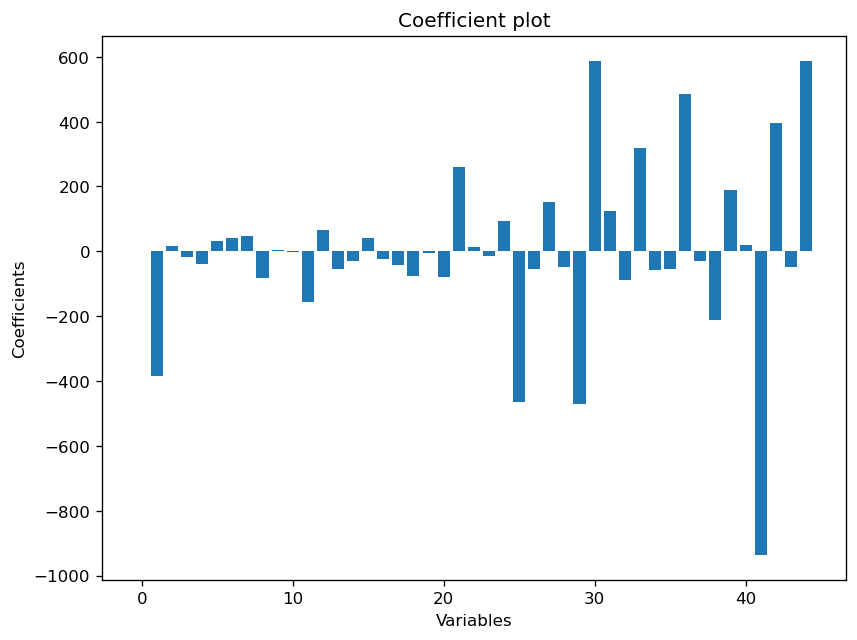

In [69]:
plt.figure(figsize=(8,6),dpi=120,facecolor="w",edgecolor="b")
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

# Checking assumptions of Linear Model

In [70]:
#arranging and calculating the residuals
residuals=pd.DataFrame(
{
    "fitted values":test_y,
    "predicted values":test_predict,
})
residuals["residuals"]=residuals["fitted values"]-residuals["predicted values"]
residuals.head()


,fitted values,predicted values,residuals
2172,697.7584,906.204648,-208.446248
6228,1414.1592,2544.719495,-1130.560295
2404,3078.6592,3008.957438,69.701762
99,1314.2892,3045.197114,-1730.907914
4945,1403.5064,1453.011713,-49.505313


In [71]:
print("len=",len(residuals["residuals"]))

len= 2131



# plotting residual curve (constant variance or homoscedastic)

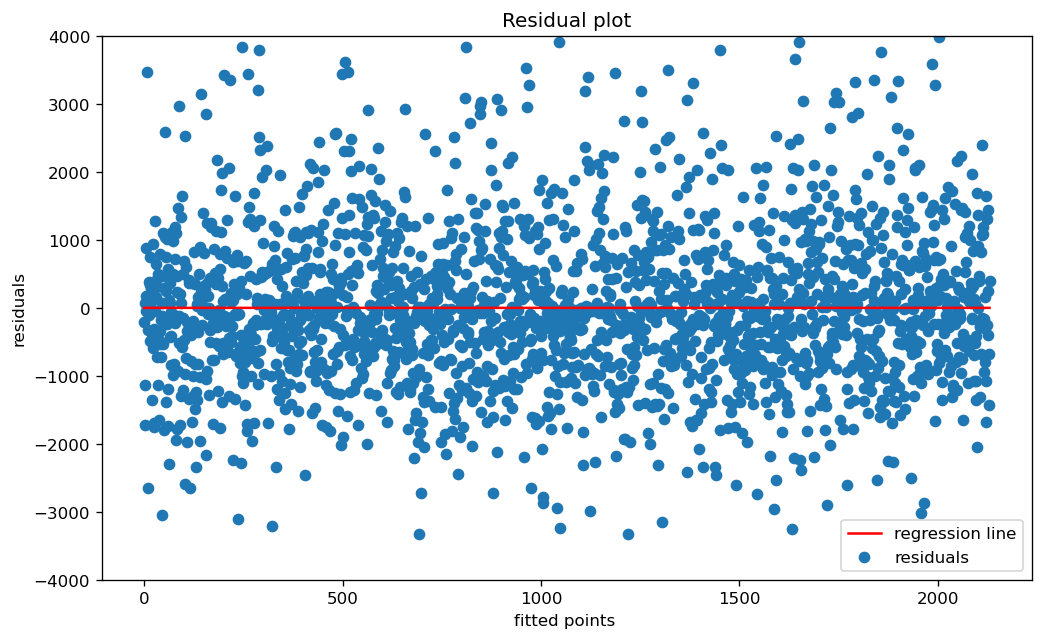

In [72]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,2131)
k = [0 for i in range(0,2131)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

the  residual plot is Homoscedrastic  the variance error across the dataset is nearly constant

# checking distribution of Residuals


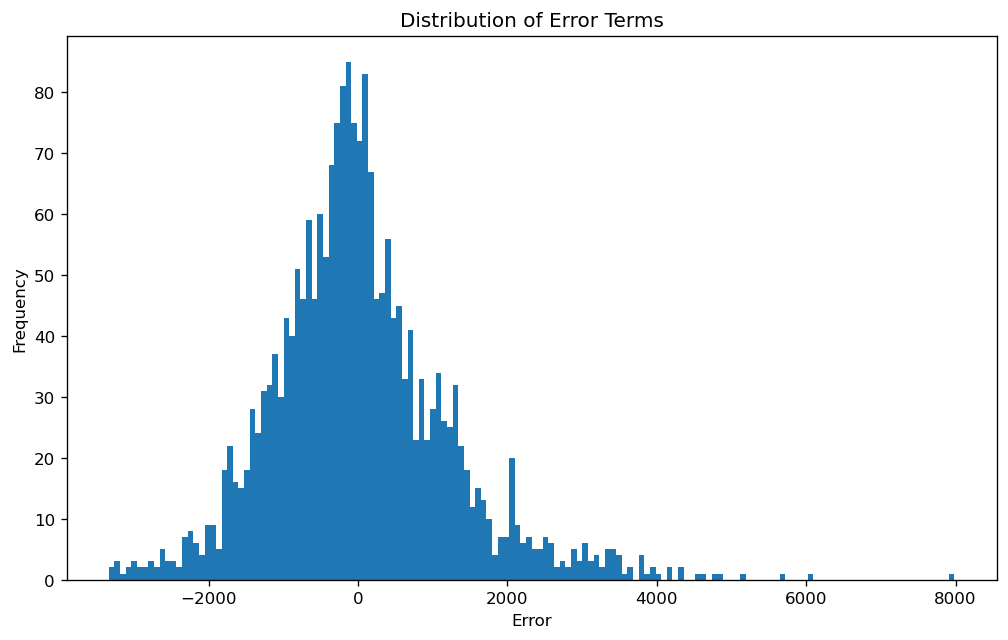

In [73]:
#histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

histogram .the distribution of error is normal.but there are outliers at higher end

# QQ-Plot (Is the data Normally Distributed?)

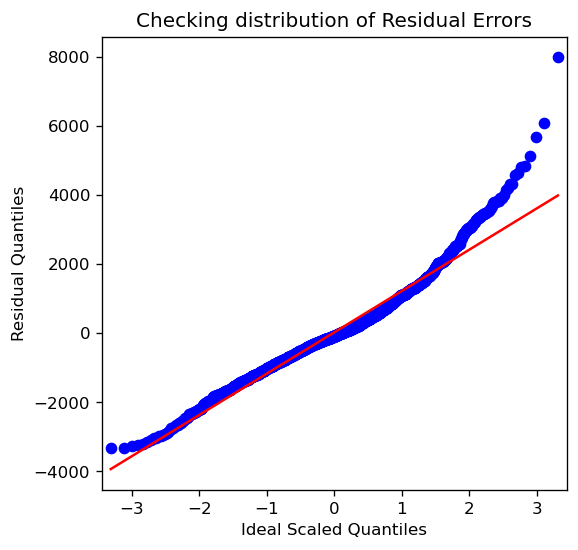

In [74]:
from statsmodels.graphics.gofplots import qqplot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

# Variance Inflation Factor (VIF) (Checking for multi collinearity

In [79]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index =data.columns)
VIF

Item_Weight                        2.349925
Item_Visibility                    1.101456
Item_MRP                           1.753170
Outlet_Establishment_Year               inf
Item_Outlet_Sales                  2.292720
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood               

# Model Interpretability

So far we have simply been predicting the values using the linear regression, But in order to Interpret the model, the normalising of the data is essential.

In [ ]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )


In [ ]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

In [ ]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

Now the coefficients we see are normalised and we can easily make final inferences out of it.

Here we can see that there are a lot of Coefficients which are near to zero and not Significant. So let us try removing them and build the model again.

In [ ]:
#creating new  subset

In [ ]:
#seperating independent and dependent variables
x = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']
x.shape, y.shape

# Arranging coefficients with features

In [ ]:
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

# Chossing variables with sigificance greater than 0.5 ( Filtering Significant Features)

In [ ]:
sig_var = Coefficients[Coefficients.coefficient > 0.5]

In [ ]:
subset = data[sig_var['Variable'].values]
subset.head()

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

# Implementing Linear Regression

In [ ]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

# Training Model

In [ ]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

# Predicting over the train set

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

# test

In [ ]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

# Plotting the coefficients

In [ ]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')